In [6]:
import torch as th
import dgl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib

Using matplotlib backend: agg


In [7]:
att = np.load('a_stat.npy')

In [8]:
att.shape

(170, 7, 8, 8)

In [10]:
att[0][0]

array([[-0.0023641 ,  0.00275465,  0.00725534,  0.00017139,  0.00155664,
         0.00040388,  0.0152246 ,  0.01575864],
       [-0.00187122, -0.00098395,  0.0003935 , -0.00188959,  0.00420832,
        -0.00320057, -0.00299848,  0.00218269],
       [ 0.00182283, -0.00650293, -0.00277639, -0.00219177, -0.00941131,
         0.01219729,  0.00381307, -0.00622269],
       [-0.00072888,  0.00036873, -0.00772294, -0.00026063, -0.00886378,
        -0.00124824, -0.00494014,  0.00073361],
       [-0.0034559 , -0.00182213,  0.00276833, -0.00407467,  0.00544962,
        -0.00021115, -0.00129522, -0.00195626],
       [ 0.00104053,  0.00732063,  0.00143329,  0.00441865, -0.00209176,
         0.00367981, -0.00094971, -0.0028236 ],
       [ 0.00146372,  0.00521288, -0.00169742,  0.00662858, -0.01048038,
        -0.00221811,  0.00203784,  0.00065007],
       [-0.00308279, -0.00040229,  0.00172087,  0.00463164, -0.00710767,
         0.00235238,  0.00147083, -0.00143752]], dtype=float32)

In [37]:
%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

In [22]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    !pip install hdbscan
    hdbscan_available = False

In [25]:
def do_plot(X_fit, title=None, labels=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

In [29]:

num_dimensions = 3
num_clusters = 4
num_points = 100
cluster_separation = 6
centers = np.array([(0,0,0), (1,0,0), (0,1,0), (0,0,1)], dtype=float) * cluster_separation
data = np.zeros((num_clusters * num_points, num_dimensions), dtype=float)
labels = np.zeros(num_clusters * num_points, dtype=int)
for c in range(num_clusters):
    start = c * num_points
    end = start + num_points
    data[start:end, :] = np.random.randn(num_points, num_dimensions) + centers[c]
    labels[start:end] = c
data_df = pd.DataFrame(data, columns=('x','y','z'))
data_df['label'] = labels
data_df.head()

,x,y,z,label
0,-0.675370,1.688140,-0.265200,0
1,0.155568,0.761956,0.847807,0
2,1.350638,-1.473423,0.034265,0
3,0.434592,-1.358099,1.528766,0
4,-0.171982,-1.484520,0.341368,0


In [35]:
X = data_df.iloc[:,0:-1]
X_std = StandardScaler().fit_transform(X)
y = data_df['label'].values

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

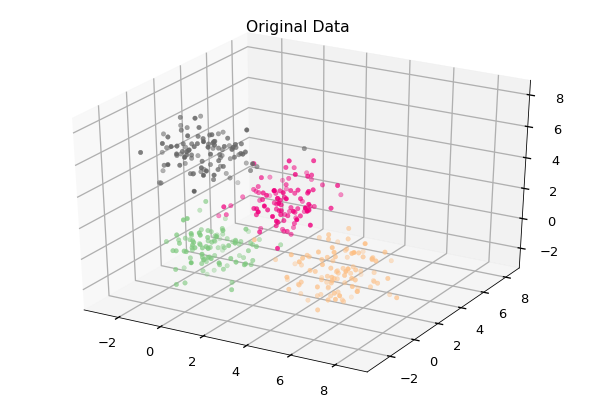

In [38]:
do_plot(X.values, 'Original Data', y)

In [45]:
centroid_emb = np.load('cora_centroid_emb.npy')

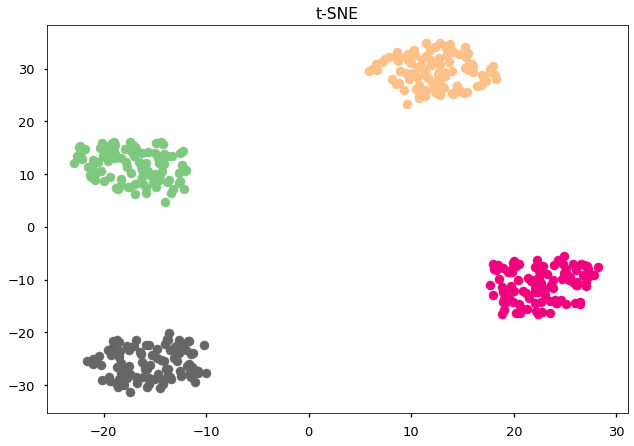

In [52]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
tsne2 = TSNE(n_components=2, random_state=0)
do_plot(tsne2.fit_transform(X), 't-SNE', y)

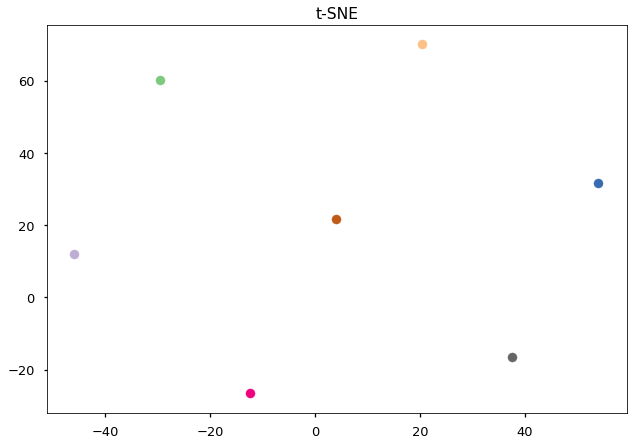

In [66]:
# centroid_emb[0]
x = centroid_emb[4]
y_cluster = np.array(list(range(7)))
do_plot(tsne2.fit_transform(x), 't-SNE', y_cluster)

In [76]:
hidden_emb = np.load('cora_hidden_emb.npy')
cora_labels = np.load('cora_labels.npy')
hidden_emb.shape

(8,)

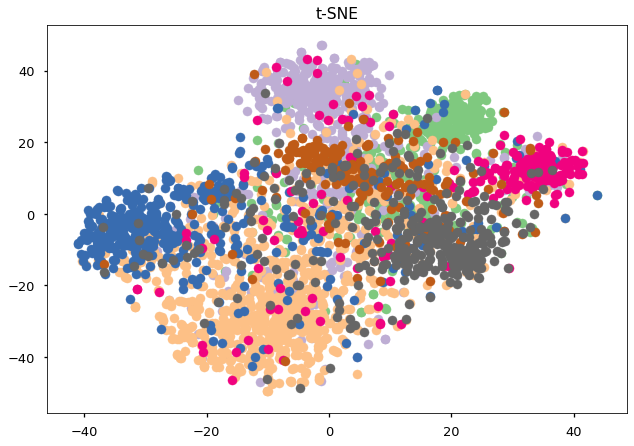

In [77]:
do_plot(tsne2.fit_transform(hidden_emb[0]), 't-SNE', cora_labels)

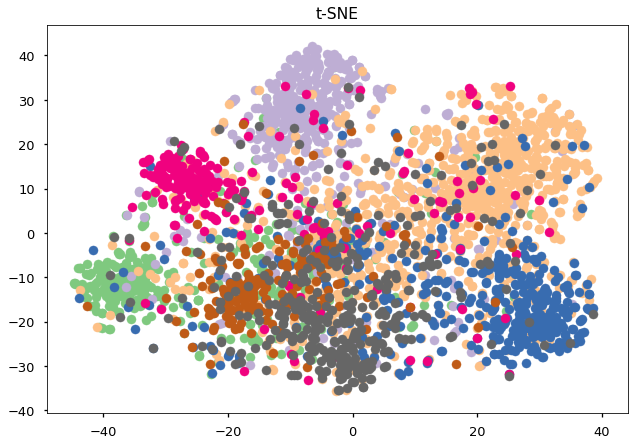

In [81]:
# hidden_emb[1].shape
do_plot(tsne2.fit_transform(hidden_emb[5]), 't-SNE', cora_labels)

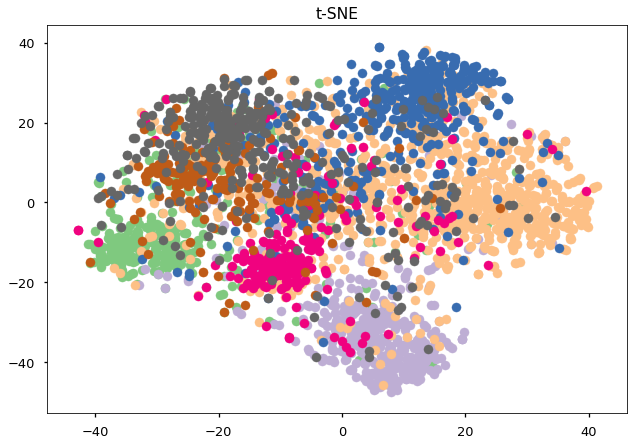

In [80]:
do_plot(tsne2.fit_transform(hidden_emb[3]), 't-SNE', cora_labels)